<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.62376

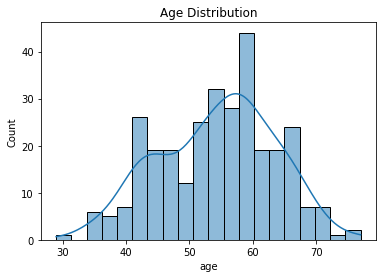

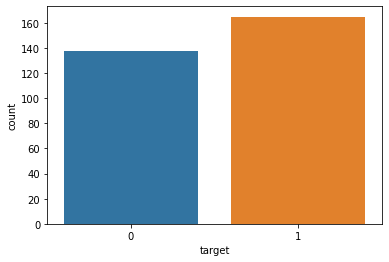

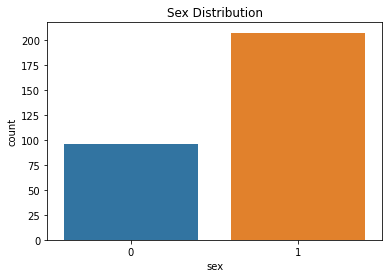

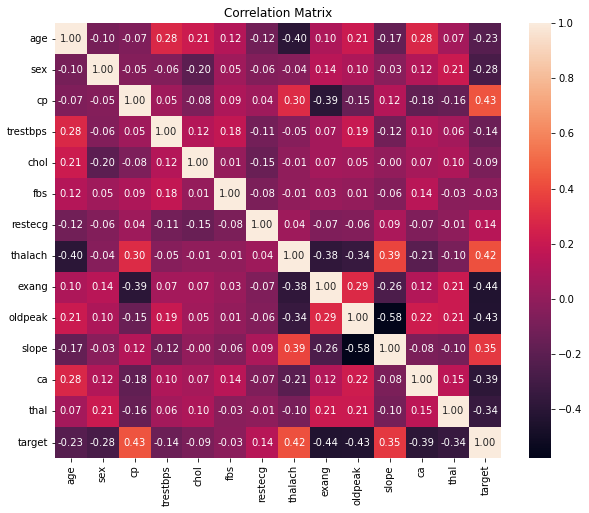

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('C:/Users/Parshuram/Downloads/heart_diease.csv')

# Basic info
print(df.info())

# Statistical summary
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize the distribution of key features
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# Distribution of the target variable
sns.countplot(x='target', data=df)
plt.show()

sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Feature selection and scaling
X = df.drop('target', axis=1)  # assuming 'target' is the column indicating the presence of heart disease
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# K-Nearest Neighbors (KNN) - Initially with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Evaluation
def evaluate_model(y_test, predictions, model_name):
    print(f"Model: {model_name}")
    print("Accuracy Score:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("------------------------------------------------------")


evaluate_model(y_test, svm_pred, "SVM")
evaluate_model(y_test, knn_pred, "KNN")


Model: SVM
Accuracy Score: 0.8688524590163934
Confusion Matrix:
 [[26  3]
 [ 5 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

------------------------------------------------------
Model: KNN
Accuracy Score: 0.9016393442622951
Confusion Matrix:
 [[27  2]
 [ 4 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

------------------------------------------------------


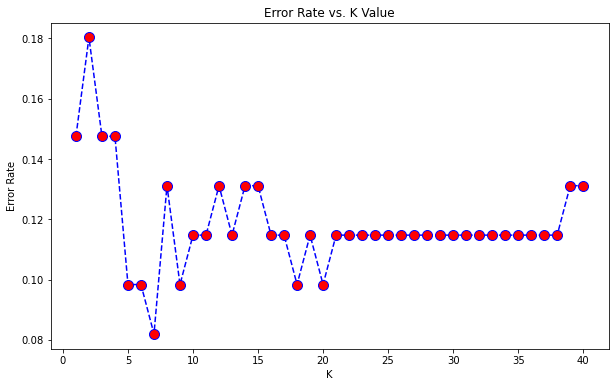

In [3]:
error_rate = []

# Will try K values from 1 to 40
for i in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plotting error rate vs. K value
plt.figure(figsize=(10, 6))
plt.plot(range(1, 41), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Feature selection and scaling
X = df.drop('target', axis=1)  # assuming 'target' is the column indicating the presence of heart disease
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# K-Nearest Neighbors (KNN) - Initially with K=5
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Evaluation
def evaluate_model(y_test, predictions, model_name):
    print(f"Model: {model_name}")
    print("Accuracy Score:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("------------------------------------------------------")


evaluate_model(y_test, knn_pred, "KNN")


Model: KNN
Accuracy Score: 0.9180327868852459
Confusion Matrix:
 [[27  2]
 [ 3 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

------------------------------------------------------


In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'df' is your DataFrame and 'target' is the label column
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of parameters for GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100],  # Experiment with more values as needed
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],  # Relevant for poly kernel
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly'
}

svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)

# Evaluate the best model found by GridSearchCV on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)
print("Accuracy on test set:", accuracy_score(y_test, predictions))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validated score: 0.8224489795918368
Accuracy on test set: 0.8688524590163934
